List branches in sdme fit tree

In [1]:
import ROOT

file_path = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/fits/twopi_plot.root"

f = ROOT.TFile.Open(file_path)
if not f or f.IsZombie():
    raise IOError(f"Failed to open {file_path}")

print(f"First two objects in {file_path}:")
for i, key in enumerate(f.GetListOfKeys()):
    obj = key.ReadObj()
    print(f"{key.GetName():30s}  ({obj.ClassName()})")
    if i == 1:  # stop after 2 entries
        break

f.Close()


: 

In [1]:
import os
import ROOT

ROOT.gROOT.SetBatch(True)  # no GUI

FILE_PATH = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/fits/twopi_plot.root"
OUT_DIR = "plots"
OUT_PDF = os.path.join(OUT_DIR, "first_histogram.pdf")

def find_first_histogram(tdir):
    """Depth-first search for the first TH1/TH2/TH3 in a TDirectory."""
    keys = tdir.GetListOfKeys()
    if not keys: 
        return None, None
    it = ROOT.TIter(keys)
    key = it.Next()
    while key:
        obj = key.ReadObj()
        # If it's a histogram, return it
        if isinstance(obj, (ROOT.TH1, ROOT.TH2, ROOT.TH3)):
            return obj, tdir.GetPath()
        # If it's a subdirectory, recurse
        if isinstance(obj, ROOT.TDirectory):
            found, path = find_first_histogram(obj)
            if found:
                return found, path
        key = it.Next()
    return None, None

def main():
    # Open file
    f = ROOT.TFile.Open(FILE_PATH)
    if not f or f.IsZombie():
        raise IOError(f"Failed to open {FILE_PATH}")

    # Find first histogram
    hist, path = find_first_histogram(f)
    if hist is None:
        raise RuntimeError("No histograms found in file.")

    os.makedirs(OUT_DIR, exist_ok=True)

    # Draw and export to a single-page PDF
    c = ROOT.TCanvas("c", "c", 800, 600)
    # Make 2D histos draw with COLZ by default; otherwise simple Draw()
    draw_opt = "COLZ" if isinstance(hist, ROOT.TH2) else ""
    hist.Draw(draw_opt)
    c.SaveAs(OUT_PDF)

    print(f"Wrote: {OUT_PDF}")
    f.Close()

if __name__ == "__main__":
    main()


: 

In [3]:
from IPython.display import display, Image
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/work/halld/home/dbarton/gluex/KShortPipLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)

# Open the file
f = ROOT.TFile.Open("/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/fits/twopi_plot.root")
f.ls()  # list all histograms in the file


atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| Saved aliases found in /app/PyAmpTools/src/pyamptools/.aliases.txt, attempting to load...
atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist un

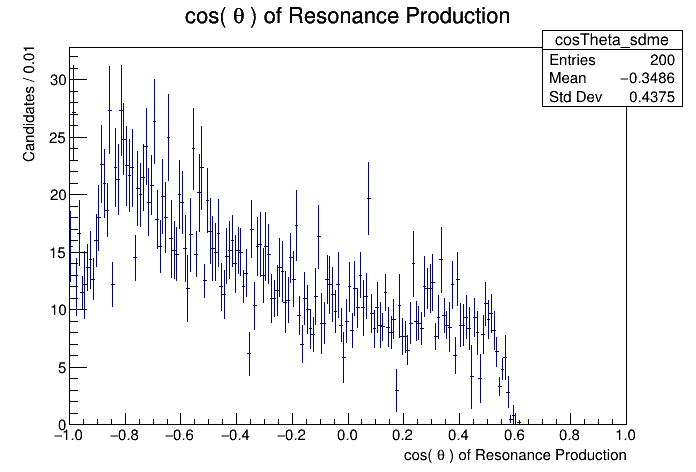

Info in <TCanvas::Print>: png file plots/tmp_plot.png has been created


In [5]:
# Example: display a histogram named "hMass"
h = f.Get("cosTheta_sdme")  # replace with the actual name you saw from f.ls()
c = ROOT.TCanvas()
h.Draw()

# Save and display in the notebook
c.SaveAs("plots/tmp_plot.png")
display(Image(filename="plots/tmp_plot.png"))
